<h1>Experiments in Gaussian + Linear fits to spectra</h1>

In [1]:
from __future__ import print_function

import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

%matplotlib inline
#plt.rcParams['figure.figsize'] = 8, 10
x_label = '$\lambda$($\mu$)'
y_label = 'erg.cm$^{-2}$.s$^{-1}$.$A^{-1}$'
plot_axis = [0.9, 2.4, 2.8e-15, 4.e-15]

<h3>Get raw data</h3>

In [2]:
data = np.genfromtxt("data/example_spec_ipac.txt")
wave = data[:,0]
flux = data[:,1]

<h3>Plot entire raw data</h3>

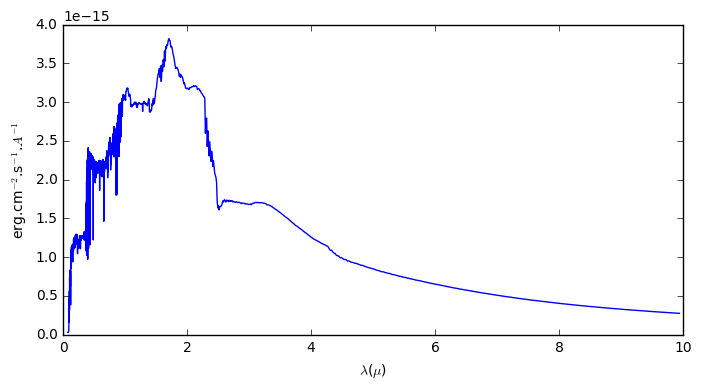

In [3]:
plt.gcf().set_size_inches(8.,4.)
plt.plot(wave, flux)
plt.xlabel(x_label)
plt.ylabel(y_label)

<h3>Extract region of interest </h3>

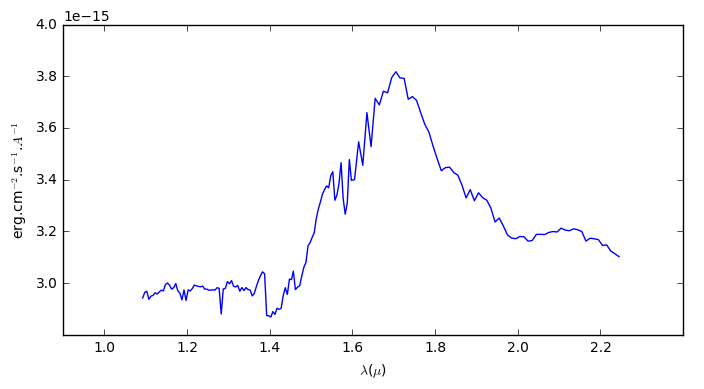

In [4]:
indices = (wave > 1.09) & (wave < 2.25)
w = wave[indices]
f = flux[indices]
plt.gcf().set_size_inches(8.,4.)
plt.axis(plot_axis)
plt.plot(w, f)
plt.xlabel(x_label)
plt.ylabel(r'erg.cm$^{-2}$.s$^{-1}$.$A^{-1}$')

<h3>Fit Gaussian + Linear using astropy </h3>

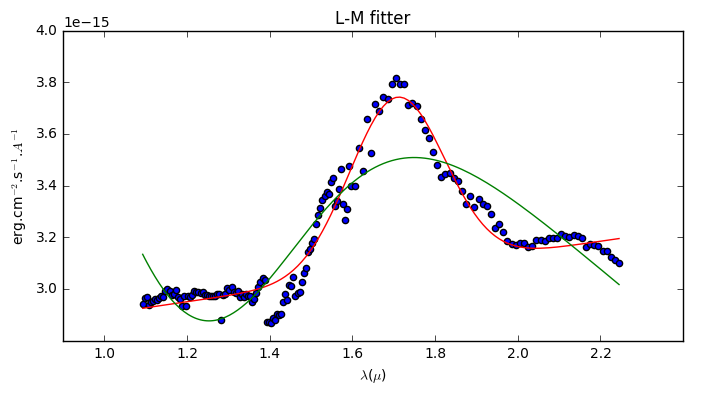

In [5]:
from astropy.modeling import models, fitting

fitter = fitting.LevMarLSQFitter()

# with specviz initialization - RED plot
centroid = np.sum(w * f) / np.sum(f)
dw = w - np.mean(w)
width = np.sqrt(np.sum((dw * dw) * f) / np.sum(f))
sum_f = np.sum(f - np.min(f))
height = sum_f / (width * np.sqrt(2 * np.pi) )
gaussian_i = models.Gaussian1D(amplitude=height, mean=centroid, stddev=width)

f_mean = np.mean(f)
linear_i = models.Linear1D(slope=0.0, intercept=f_mean)

model_i = gaussian_i + linear_i
fm_i = fitter(model_i, w, f, maxiter=2000)

# with astropy defaults - GREEN plot
model = models.Gaussian1D() + models.Linear1D()
fm = fitter(model, w, f, maxiter=2000)

plt.gcf().set_size_inches(8.,4.)
plt.axis(plot_axis)
plt.scatter(w, f)
plt.plot(w, fm_i(w), color='red')
plt.plot(w, fm(w), color='green')
plt.xlabel(x_label)
plt.ylabel(r'erg.cm$^{-2}$.s$^{-1}$.$A^{-1}$')
plt.title("L-M fitter")

<h3>Repeat with Simplex and SLSQP fitter </h3>

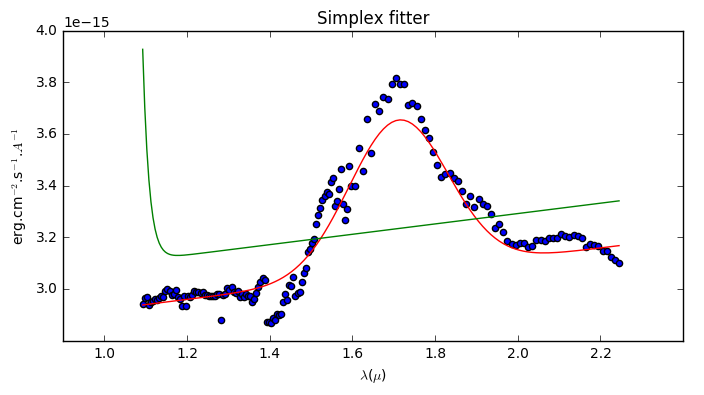

In [6]:
from astropy.modeling import models, fitting

fitter = fitting.SimplexLSQFitter()

# with specviz initialization - RED plot
centroid = np.sum(w * f) / np.sum(f)
dw = w - np.mean(w)
width = np.sqrt(np.sum((dw * dw) * f) / np.sum(f))
sum_f = np.sum(f - np.min(f))
height = sum_f / (width * np.sqrt(2 * np.pi) )
gaussian_i = models.Gaussian1D(amplitude=height, mean=centroid, stddev=width)

f_mean = np.mean(f)
linear_i = models.Linear1D(slope=0.0, intercept=f_mean)

model_i = gaussian_i + linear_i
fm_i = fitter(model_i, w, f, maxiter=10000)

# with astropy defaults - GREEN plot
model = models.Gaussian1D() + models.Linear1D()
fm = fitter(model, w, f, maxiter=10000)

plt.gcf().set_size_inches(8.,4.)
plt.axis(plot_axis)
plt.scatter(w, f)
plt.plot(w, fm_i(w), color='red')
plt.plot(w, fm(w), color='green')
plt.xlabel(x_label)
plt.ylabel(r'erg.cm$^{-2}$.s$^{-1}$.$A^{-1}$')
plt.title("Simplex fitter")

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.38866676278e-25
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 9.44838126633e-08
            Iterations: 25
            Function evaluations: 183
            Gradient evaluations: 25


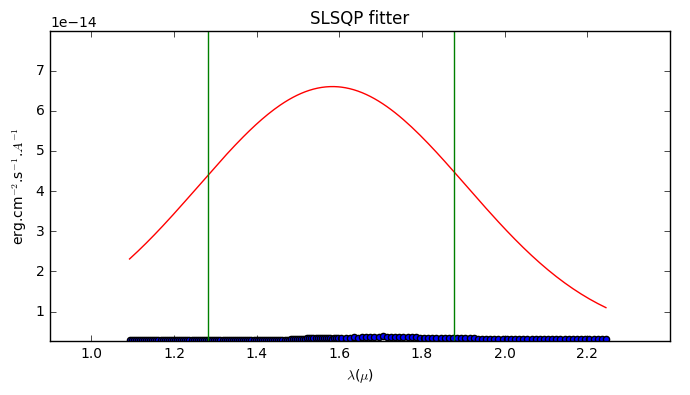

In [7]:
from astropy.modeling import models, fitting

fitter = fitting.SLSQPLSQFitter()

# with specviz initialization - RED plot
centroid = np.sum(w * f) / np.sum(f)
dw = w - np.mean(w)
width = np.sqrt(np.sum((dw * dw) * f) / np.sum(f))
sum_f = np.sum(f - np.min(f))
height = sum_f / (width * np.sqrt(2 * np.pi) )
gaussian_i = models.Gaussian1D(amplitude=height, mean=centroid, stddev=width)

f_mean = np.mean(f)
linear_i = models.Linear1D(slope=0.0, intercept=f_mean)

model_i = gaussian_i + linear_i
fm_i = fitter(model_i, w, f, maxiter=10000)

# with astropy defaults - GREEN plot
model = models.Gaussian1D() + models.Linear1D()
fm = fitter(model, w, f, maxiter=10000)

plt.gcf().set_size_inches(8.,4.)
#plt.axis(plot_axis)
plt.axis([0.9, 2.4, 2.8e-15, 8.e-14])
plt.scatter(w, f)
plt.plot(w, fm_i(w), color='red')
plt.plot(w, fm(w), color='green')
plt.xlabel(x_label)
plt.ylabel(r'erg.cm$^{-2}$.s$^{-1}$.$A^{-1}$')
plt.title("SLSQP fitter")